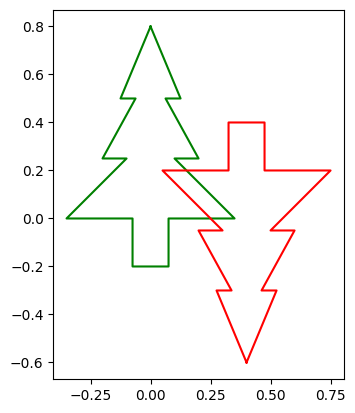

In [2]:
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
from shapely import affinity
from decimal import Decimal

scale_factor = 1.0 # Simplify for visualization

def get_tree_polygon(x=0, y=0, angle=0):
    # Simplified from kernel
    trunk_w = 0.15
    trunk_h = 0.2
    base_w = 0.7
    mid_w = 0.4
    top_w = 0.25
    tip_y = 0.8
    tier_1_y = 0.5
    tier_2_y = 0.25
    base_y = 0.0
    trunk_bottom_y = -trunk_h
    
    # Vertices based on kernel description
    coords = [
        (0.0, tip_y), # Tip
        (top_w/2, tier_1_y), (top_w/4, tier_1_y), # Top Tier Right
        (mid_w/2, tier_2_y), (mid_w/4, tier_2_y), # Mid Tier Right
        (base_w/2, base_y), # Base Tier Right
        (trunk_w/2, base_y), (trunk_w/2, trunk_bottom_y), # Trunk Right
        (-trunk_w/2, trunk_bottom_y), (-trunk_w/2, base_y), # Trunk Left
        (-base_w/2, base_y), # Base Tier Left
        (-mid_w/4, tier_2_y), (-mid_w/2, tier_2_y), # Mid Tier Left
        (-top_w/4, tier_1_y), (-top_w/2, tier_1_y) # Top Tier Left
    ]
    
    poly = Polygon(coords)
    rotated = affinity.rotate(poly, angle, origin=(0, 0))
    translated = affinity.translate(rotated, xoff=x, yoff=y)
    return translated

# Visualize two trees interlocking
t1 = get_tree_polygon(0, 0, 0)
t2 = get_tree_polygon(0.4, 0.2, 180) # Try to interlock upside down

fig, ax = plt.subplots()
x, y = t1.exterior.xy
ax.plot(x, y, color='green')
x, y = t2.exterior.xy
ax.plot(x, y, color='red')
ax.set_aspect('equal')
plt.show()
